In [2]:
import numpy as np
import cv2 as cv

In [3]:
image = cv.imread("C:/Users/VEDIT/Desktop/mike/387011_3d-cute-wallpapers-for-desktop-hd-1-jpg_1024x768_h.jpg")
cv.imshow('image',image)
k = cv.waitKey(0)

In [7]:
# cv.namedWindow('image', cv.WINDOW_NORMAL)
# cv.imshow('image',img)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [9]:
gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
cv.imshow('gray',gray)
cv.waitKey(0)

-1

In [10]:
ret,thresh = cv.threshold(gray,125,175,cv.THRESH_BINARY)
cv.imshow('thresh',thresh)
cv.waitKey(0)

-1

In [11]:
import matplotlib.pyplot as plt

In [12]:
hist = cv.calcHist([gray],[0],None,[256],[0,256])

In [13]:
hist,bins =  np.histogram(image.ravel(),256,[0,256])

In [14]:
bins = np.bincount(gray.ravel(),minlength = 256)

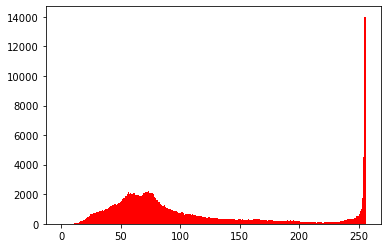

In [15]:
plt.hist(gray.ravel(),256,[0,256],color = 'red')
plt.show()

In [16]:
mask = np.zeros(gray.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv.bitwise_and(gray,gray,mask = mask)

In [17]:
hist_full = cv.calcHist([gray],[0],None,[256],[0,256])
hist_mask = cv.calcHist([gray],[0],mask,[256],[0,256])

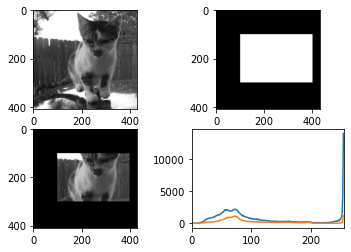

In [18]:
plt.subplot(221), plt.imshow(gray, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

In [19]:
cdf = hist.cumsum()

In [20]:
cdf_normalized = cdf * hist.max()/cdf.max()

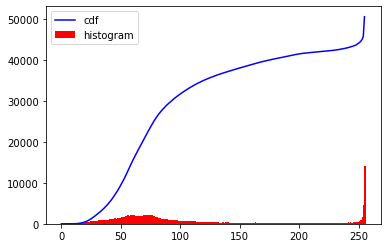

In [21]:
plt.plot(cdf_normalized,color = 'b')
plt.hist(gray.flatten(),256,[0,256],color = 'red')
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [22]:
cdfm = np.ma.masked_equal(gray,0)

In [23]:
cdfm = (cdfm - cdfm.min()) * 255/(cdfm.max() - cdfm.min())

In [24]:
cdf = np.ma.filled(cdfm,0).astype('uint8')
# cdf = np.ma.filled(cdfm,0).astype('uint8')

In [25]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [26]:
image2 = cdf[gray]

In [27]:
cv.imshow('image2',gray)
cv.waitKey(0)

-1

In [28]:
# eq = cv.equalizeHist(gray)
# cv.imshow('eq',eq)
# cv.waitKey(0)
color = ('b','g','r')

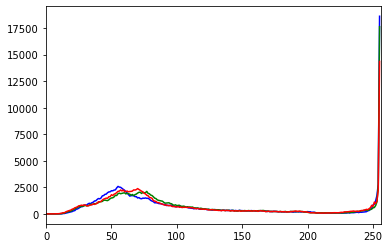

In [29]:
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [30]:
mask = np.zeros(image.shape[:2],np.uint8)
mask[200:800,400:1000] = 255


In [31]:
cv.imshow('mask',mask)
cv.waitKey(0)

-1

In [32]:
masked_image = cv.bitwise_and(gray,gray,mask = mask)

In [33]:
cv.imshow('masked',masked_image)
cv.waitKey(0)

-1

In [34]:
histm = cv.calcHist([masked_image],[0],mask,256,[0,256])

SystemError: <built-in function calcHist> returned NULL without setting an error

In [35]:
histm = np.histogram(masked_image.flatten(),256,[0,256])

In [36]:
cdfm = hist.cumsum()

In [37]:
# cdfmc = cdfm * histm.max()//cdfm.max()
cdfmn = cdfm * histm.max()/ cdfm.max()

AttributeError: 'tuple' object has no attribute 'max'

In [39]:
cany = cv.Canny(image,125,255)
cv.imshow('cany',cany)
cv.waitKey(0)

-1

In [40]:
opened = cv.morphologyEx(cany,cv.MORPH_OPEN,(7,7))
cv.imshow('opened',opened)
cv.waitKey(0)

-1

In [44]:
closed = cv.morphologyEx(cany,cv.MORPH_CLOSE,(7,7))
cv.imshow('closed',closed)
cv.waitKey(0)

-1

In [1]:
gradient = cv.morphologyEx(cany,cv.MORPH_GRADIENT,(7,7))
cv.imshow('gradient',gradient)
cv.waitKey(0)

NameError: name 'cv' is not defined

In [42]:
tophat = cv.morphologyEx(cany,cv.MORPH_TOPHAT,(7,7))
cv.imshow('tophat',tophat)
cv.waitKey(0)

-1

In [41]:
blackhat = cv.morphologyEx(cany,cv.MORPH_BLACKHAT,(7,7))
cv.imshow('blackhat',blackhat)
cv.waitKey(0)

-1

In [122]:
sobel = cv.Sobel(cany,cv.CV_64F,1,0,ksize = 7)
cv.imshow('sobel',sobel)
cv.waitKey(0)

-1

In [121]:
sobely = cv.Sobel(cany,cv.CV_64F,0,1,ksize = 7)
cv.imshow('sobely',sobely)
cv.waitKey(0)

-1

In [139]:
laplacian = cv.Laplacian(cany,cv.CV_64F)
cv.imshow('laplacian',laplacian)
cv.waitKey(0)

13

In [141]:
blank = np.zeros(image.shape[:2],dtype = 'uint8')
blank[200:800,200:600] = 255

In [142]:
blanks = cv.Sobel(blank,cv.CV_8U,1,0,ksize = 7)

In [143]:
cv.imshow('blank',blank)
cv.waitKey(0)

-1

In [144]:
abdd = np.absolute(blanks)

In [145]:
uint = np.uint8(abdd)

In [146]:
cv.imshow('uint',uint)
cv.waitKey(0)

-1

In [147]:
def translate(image,x,y):
    transmat = np.float32([[1,0,x],[0,1,y]])
    (heigth,width) = (image.shape[:2])
    dimensions = (width,heigth)
    return cv.warpAffine(image,transmat,dimensions)


In [150]:
trans = translate(image,-100,-100)
cv.imshow('trans',trans)
cv.waitKey(0)

-1

In [5]:
image = cv.imread("C:/Users/VEDIT/Desktop/machine learning/dogs-vs-cats/data/cat.11.jpg")

In [6]:
def rotate(image,angle,rotpoint = None):
    
    (width,heigth) = (image.shape[:2])
    if(rotpoint == None):
        rotpoint = (width//2,heigth//2)
    # get the rotation matrix
    rotmat = cv.getRotationMatrix2D(rotpoint,angle,1.0)
    dimensions = (width,heigth)
    return cv.warpAffine(image,rotmat,dimensions)

# def rotate(img,angle,rotpoint = None):
#     (height,width) = img.shape[:2]
#     if(rotpoint == None):
#         rotpoint = (width//2,height//2)
#     rotMat = cv.getRotationMatrix2D(rotpoint,angle,1.0)
#     dimensions = (width,height)
    
#     return cv.warpAffine(image,rotMat,dimensions)

        

In [45]:
rot = rotate(image,45)
cv.imshow('rot',image)
cv.waitKey(0)

-1

In [187]:
blur = cv.GaussianBlur(image,(7,7),8)
cv.imshow('blur',blur)
cv.waitKey(0)

-1

In [179]:
kernel = np.ones((5,5),np.float32)//25

In [183]:
median = cv.medianBlur(image,7)
cv.imshow('median',median)
cv.waitKey(0)

-1

In [186]:
bil = cv.bilateralFilter(image,9,75,75)
cv.imshow('bil',bil)
cv.waitKey(0)

-1

In [3]:
blank1 = np.zeros((500,500,3),dtype = 'uint8')
cv.imshow('blank',blank)
cv.waitKey(0)

NameError: name 'blank' is not defined

In [51]:
image = cv.imread("C:/Users/VEDIT/Desktop/machine learning/dogs-vs-cats/data/cat.4085.jpg",0)

laplacian = cv.Laplacian(image,cv.CV_64F)
cv.imshow('laplacian',laplacian)
cv.waitKey(0)

-1